In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage
import imageio.v2 as imageio
from glob import glob
image_name = 'Jun_2019'

## Normalize SAR

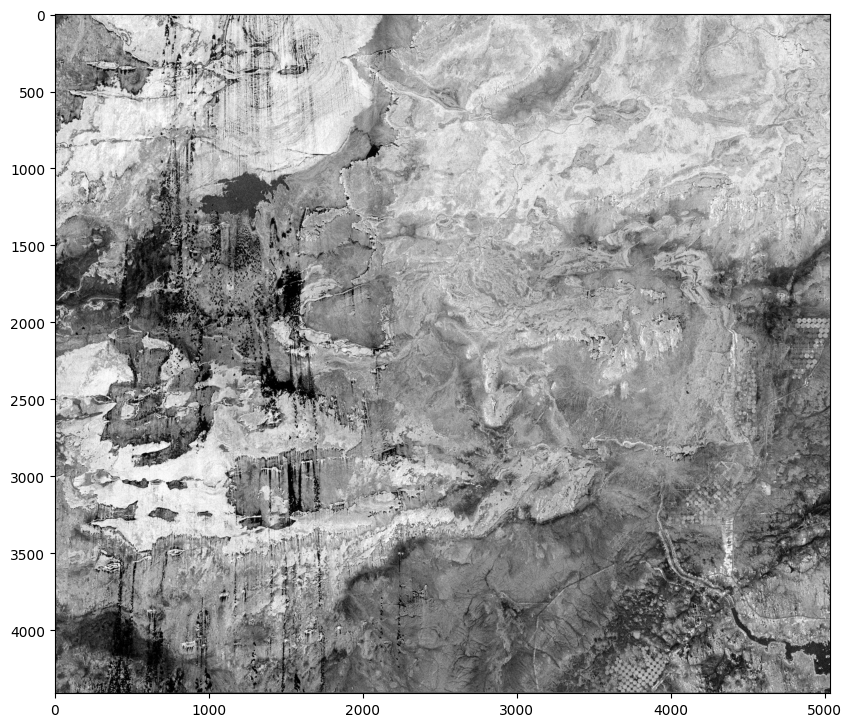

In [2]:
sar_image = imageio.imread(f"preprocess/sentinel_1/{image_name}.tif")
plt.figure(figsize=(10,12))
plt.imshow(sar_image, cmap='gray')
plt.show()

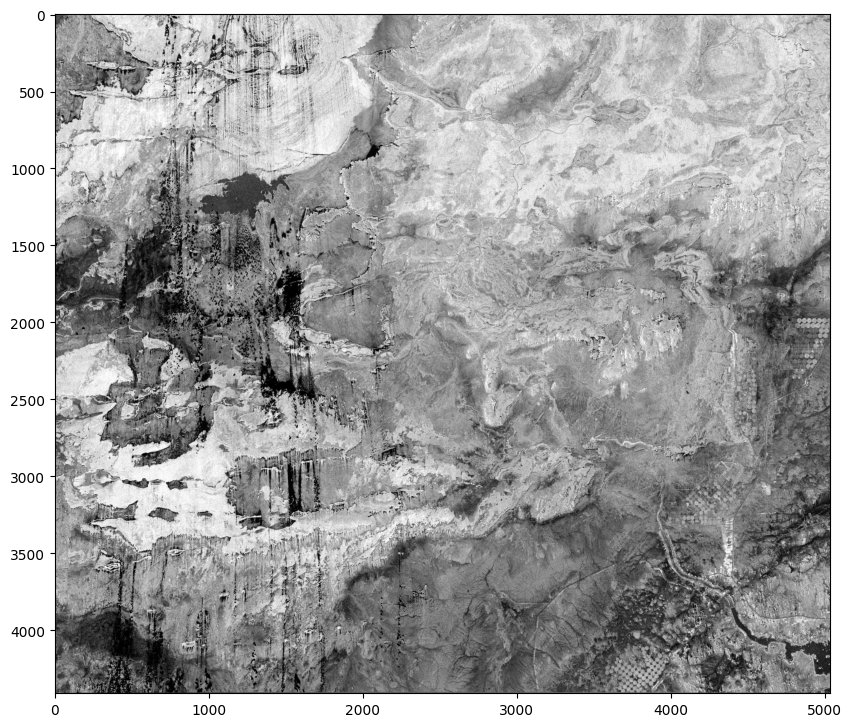

In [3]:
shifted_sar_image = sar_image - sar_image.min()
plt.figure(figsize=(10,12))
plt.imshow(shifted_sar_image, cmap='gray')
plt.show()

In [4]:
dataset = glob("preprocess/sentinel_1/*.tif")
pixels_sum = 0
pixels_total = 0
for image_path in dataset:
    image = imageio.imread(image_path)
    image_32 = image.astype(np.float32)
    shifted_image = image_32 - image_32.min()
    pixels_sum += shifted_image.sum()
    pixels_total += shifted_image.size

pixels_mean = pixels_sum / pixels_total
np.round(pixels_mean,2)

12.29

In [5]:
sum_squared_diff = 0 
for image_path in dataset:
    image = imageio.imread(image_path)
    image_32 = image.astype(np.float32)
    shifted_image = image_32 - image_32.min()
    squared_diff = ((shifted_image - pixels_mean)**2).sum()
    sum_squared_diff += squared_diff

In [6]:
std = np.sqrt(sum_squared_diff / pixels_total)
np.round(std,2)

5.27

In [7]:
sar_ds_mean = 12.29
sar_ds_st = 5.27

In [8]:
# Normalize the SAR Dataset
for image_path in dataset:
    sar_image = imageio.imread(image_path)
    image_id = image_path.split('/')[-1].split('.')[0]
    shifted_sar_image = sar_image - sar_image.min()
    normalized_sar_image = (shifted_sar_image - sar_ds_mean) / sar_ds_st
    imageio.imwrite(f"processed/sentinel_1/{image_id}.tif", normalized_sar_image)

In [9]:
norm_sar_image = imageio.imread("processed/sentinel_1/Jan_2020.tif")
print(norm_sar_image.min(), norm_sar_image.max()) 
norm_sar_image.mean() , norm_sar_image.astype(np.float32).std()

-2.332 1.457


(-0.1897, 0.92393833)

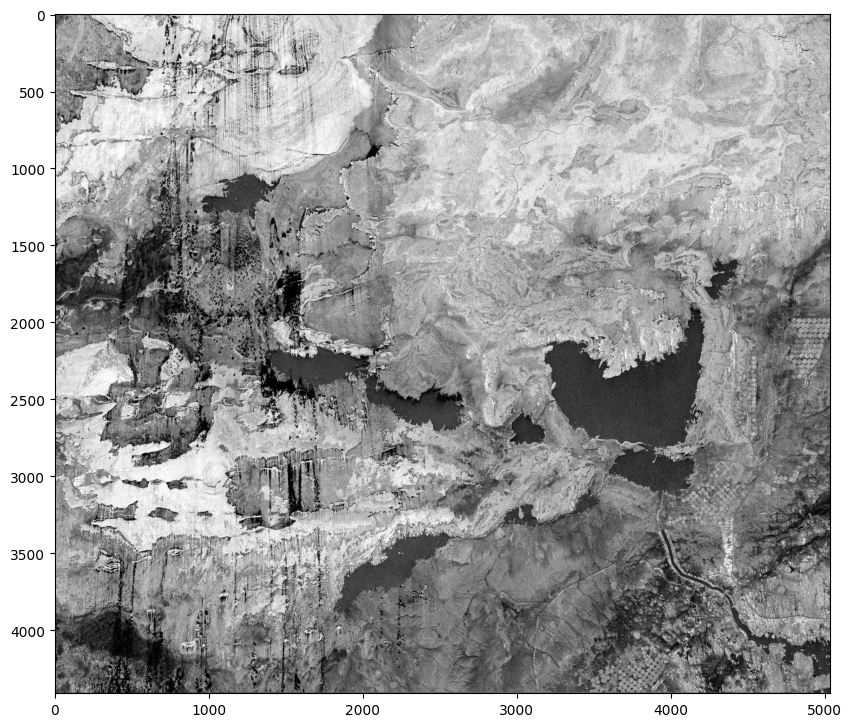

In [10]:
plt.figure(figsize=(10,12))
plt.imshow(norm_sar_image, cmap='gray')
plt.show()